In [84]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [86]:
def file_get_contents(filename):
    with open(filename) as f:
        return f.read()

In [103]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import json
import re
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

def calculate_cossine_simillarity(files_analyses): 
  contents_docs = []

  for file in files_analyses:
    file_json_contents = file_get_contents("./files_parseds/" + file + ".json")
    json_data = json.loads(file_json_contents)
    content_pages = [re.sub(r'[0-9]', '', content["text"]) for content in json_data["content"]]
    contents_docs.append(' '.join(content_pages))
  
  stop_words = ["aracaju","de","a","o","que","e","do","da","em","um","para","é", "etc","com","não","uma","os","no","se","na","por","mais","as","dos","como","mas","foi","ao","ele","das","tem","à","seu","sua","ou","ser","quando","muito","há","nos","já","está","eu","também","só","pelo","pela","até","isso","ela","entre","era","depois","sem","mesmo","aos","ter","seus","quem","nas","me","esse","eles","estão","você","tinha","foram","essa","num","nem","suas","meu","às","minha","têm","numa","pelos","elas","havia","seja","qual","será","nós","tenho","lhe","deles","essas","esses","pelas","este","fosse","dele","tu","te","vocês","vos","lhes","meus","minhas","teu","tua","teus","tuas","nosso","nossa","nossos","nossas","dela","delas","esta","estes","estas","aquele","aquela","aqueles","aquelas","isto","aquilo","estou","está","estamos","estão","estive","esteve","estivemos","estiveram","estava","estávamos","estavam","estivera","estivéramos","esteja","estejamos","estejam","estivesse","estivéssemos","estivessem","estiver","estivermos","estiverem","hei","há","havemos","hão","houve","houvemos","houveram","houvera","houvéramos","haja","hajamos","hajam","houvesse","houvéssemos","houvessem","houver","houvermos","houverem","houverei","houverá","houveremos","houverão","houveria","houveríamos","houveriam","sou","somos","são","era","éramos","eram","fui","foi","fomos","foram","fora","fôramos","seja","sejamos","sejam","fosse","fôssemos","fossem","for","formos","forem","serei","será","seremos","serão","seria","seríamos","seriam","tenho","tem","temos","tém","tinha","tínhamos","tinham","tive","teve","tivemos","tiveram","tivera","tivéramos","tenha","tenhamos","tenham","tivesse","tivéssemos","tivessem","tiver","tivermos","tiverem","terei","terá","teremos","terão","teria","teríamos","teriam"]
  vectorizer = TfidfVectorizer(
      stop_words=stop_words,
      use_idf=True,
      ngram_range=(1,2),
  )
  vectorizer.fit_transform(contents_docs)

  tfidf_text1, tfidf_text2 = vectorizer.transform([contents_docs[0]]), vectorizer.transform([contents_docs[1]])

  cs_score = cosine_similarity(tfidf_text1, tfidf_text2)
      
  return np.round(cs_score[0][0],4)

In [163]:

import re

documents_to_analyses = [
  "DELEGADA DANIELLE_260000637328",
  "EDVALDO_260000983413",
  "ALEXIS PEDRÃO_260001087378",
  "MÁRCIO MACEDO_260000958767",
  "ALMEIDA LIMA_260000935642",
  "DELEGADO PAULO MARCIO_260001037485",
  "GEORLIZE_260000835177",
  "GILVANI SANTOS_260000935814",
  "JURACI NUNES_260000743434",
  "LÚCIO FLÁVIO_260000857748",
  "RODRIGO VALADARES_260001065879",
]
file_analyse = documents_to_analyses[7]
analyses = [[], []]

for file_to_analyse in documents_to_analyses:
  if file_to_analyse != file_analyse:
    score_analyse = calculate_cossine_simillarity([file_analyse, file_to_analyse])
    analyses[0].append(re.sub("[^a-zA-Z]+", "", file_to_analyse))
    analyses[1].append(score_analyse)
    print("Comparer to %s and %s" % (file_analyse, file_to_analyse))
    print(score_analyse)
  



Comparer to GILVANI SANTOS_260000935814 and DELEGADA DANIELLE_260000637328
0.0376
Comparer to GILVANI SANTOS_260000935814 and EDVALDO_260000983413
0.2389
Comparer to GILVANI SANTOS_260000935814 and ALEXIS PEDRÃO_260001087378
0.4659
Comparer to GILVANI SANTOS_260000935814 and MÁRCIO MACEDO_260000958767
0.255
Comparer to GILVANI SANTOS_260000935814 and ALMEIDA LIMA_260000935642
0.2594
Comparer to GILVANI SANTOS_260000935814 and DELEGADO PAULO MARCIO_260001037485
0.2653
Comparer to GILVANI SANTOS_260000935814 and GEORLIZE_260000835177
0.3265
Comparer to GILVANI SANTOS_260000935814 and JURACI NUNES_260000743434
0.2031
Comparer to GILVANI SANTOS_260000935814 and LÚCIO FLÁVIO_260000857748
0.169
Comparer to GILVANI SANTOS_260000935814 and RODRIGO VALADARES_260001065879
0.2702


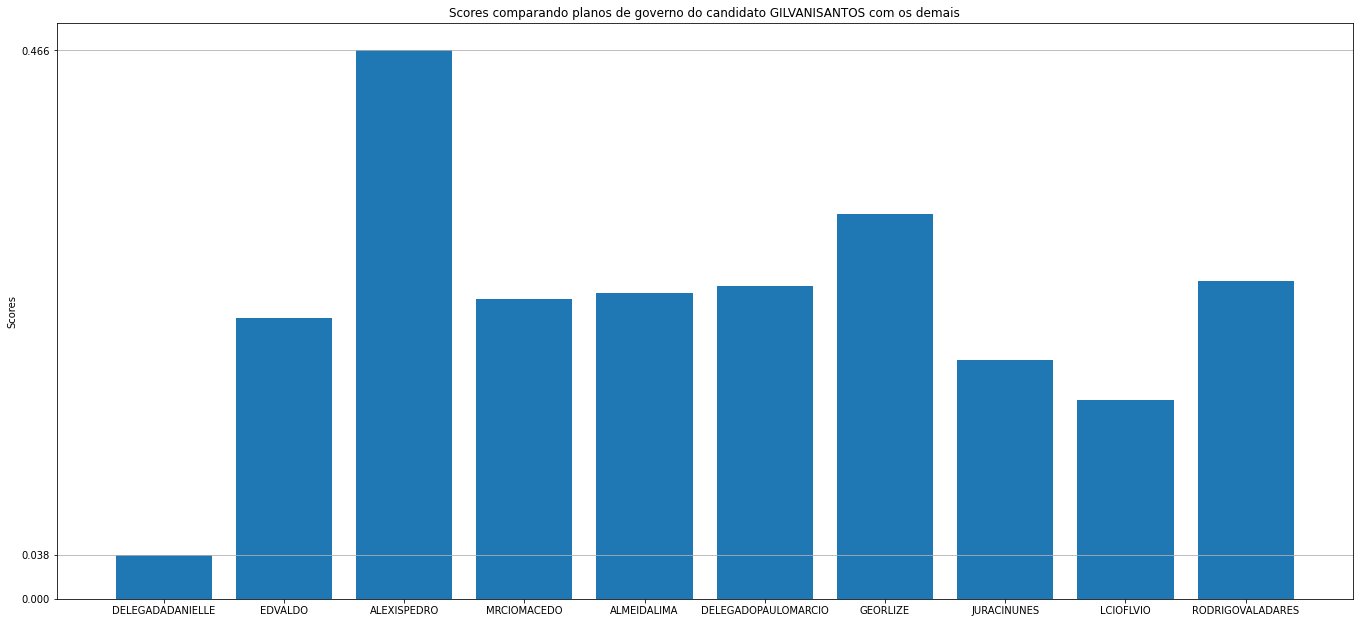

In [170]:
import matplotlib.pyplot as plt
import numpy as np

file_analyse_name = re.sub("[^a-zA-Z]+", "", file_analyse)
fig = plt.figure()
ax = fig.add_axes([0,0,3,2])
candidates_comparer = np.array(analyses[0])
candidates_distance = np.array(analyses[1])
ax.set_ylabel('Scores')
#plt.ylim(0,1)
yticks = candidates_distance;
plt.yticks([0, candidates_distance.min(), candidates_distance.max(), 1])
plt.grid(axis='y', linestyle='-')
ax.set_title('Scores comparando planos de governo do candidato %s com os demais' % (file_analyse_name))
ax.bar(candidates_comparer,candidates_distance)
plt.show()

In [112]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

sentence1 = 'I like eating ice cream on a hot summer day.'
sentence2 = 'Only boring people do not like eating ice cream.'
sentence3 = 'I do not like going out during the summer since it is so hot.'

# returns the cosine similarity value of the two given texts
def compute_cosine_similarity(text1, text2):
    
    # stores text in a list
    list_text = [text1, text2]
    
    # converts text into vectors with the TF-IDF 
    vectorizer = TfidfVectorizer(stop_words='english')
    vectorizer.fit_transform(list_text)
    tfidf_text1, tfidf_text2 = vectorizer.transform([list_text[0]]), vectorizer.transform([list_text[1]])
    
    # computes the cosine similarity
    cs_score = cosine_similarity(tfidf_text1, tfidf_text2)
    
    return np.round(cs_score[0][0],2)
  


# use function to compute cosine similarity
cosine_similarity12 = compute_cosine_similarity(sentence2, sentence1)
cosine_similarity13 = compute_cosine_similarity(sentence1,sentence3)
cosine_similarity23 = compute_cosine_similarity(sentence2,sentence3)

# print results
print('The cosine similarity of sentence 1 and 2 is {}.'.format(cosine_similarity12))
print('The cosine similarity of sentence 1 and 3 is {}.'.format(cosine_similarity13))
print('The cosine similarity of sentence 2 and 3 is {}.'.format(cosine_similarity23))

The cosine similarity of sentence 1 and 2 is 0.45.
The cosine similarity of sentence 1 and 3 is 0.41.
The cosine similarity of sentence 2 and 3 is 0.12.
